In [2]:
import joblib
regressor = joblib.load('rf_model_d13.joblib')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_pickle("training_df")
X = df.drop(['cr'], axis=1)
y = df['cr']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [3]:
import numpy as np
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [11]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 17 (0.238983)
2. feature 25 (0.126402)
3. feature 16 (0.108443)
4. feature 22 (0.094476)
5. feature 15 (0.057420)
6. feature 23 (0.053966)
7. feature 19 (0.046386)
8. feature 5 (0.041008)
9. feature 13 (0.037707)
10. feature 3 (0.035891)
11. feature 21 (0.031101)
12. feature 20 (0.029233)
13. feature 27 (0.023847)
14. feature 9 (0.013607)
15. feature 24 (0.012742)
16. feature 18 (0.007244)
17. feature 6 (0.007008)
18. feature 12 (0.006404)
19. feature 4 (0.005235)
20. feature 8 (0.004014)
21. feature 7 (0.003694)
22. feature 0 (0.003620)
23. feature 10 (0.002733)
24. feature 26 (0.002391)
25. feature 14 (0.002357)
26. feature 2 (0.002342)
27. feature 11 (0.001297)
28. feature 1 (0.000449)


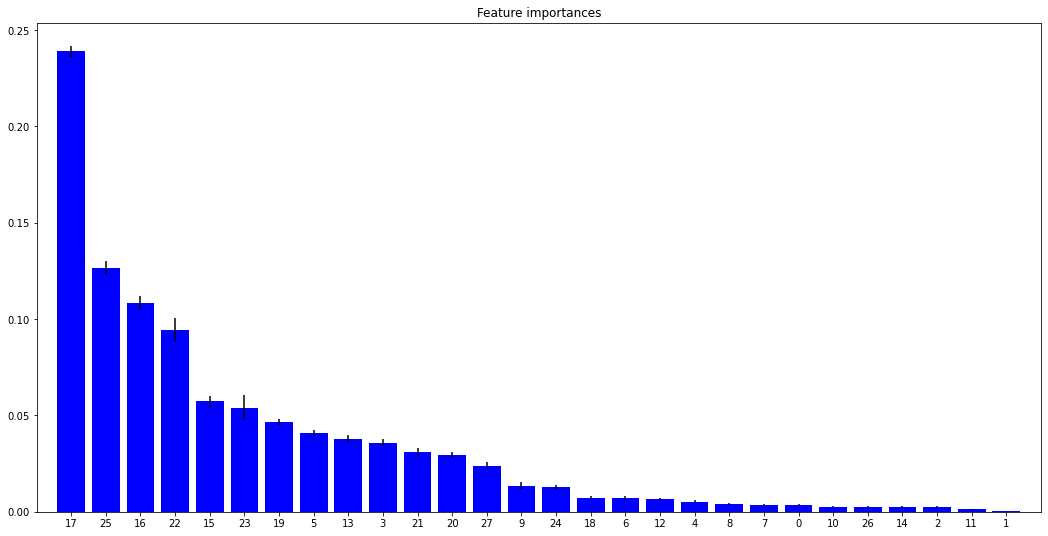

In [12]:
import matplotlib.pyplot as plt
# Plot the feature importances of the forest
plt.figure(figsize=(18,9))
plt.title("Feature importances")
n=28
_ = plt.bar(range(n), importances[indices][:n], color="b", yerr=std[indices][:n])
plt.xticks(range(n), indices)
plt.xlim([-1, n])
plt.show()